<a href="https://colab.research.google.com/github/omamazainab/Deep-Learning-Excercises/blob/master/Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
if tf.__version__ != 2:
  !pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 106kB/s 
     |████████████████████████████████| 3.8MB 37.4MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [3]:
 from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)
 len(train_data)

Using TensorFlow backend.


8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 281us/sample - loss: 2.7911 - accuracy: 0.5278 - val_loss: 1.8738 - val_accuracy: 0.6210
Epoch 2/20
7982/7982 [==============================] - 1s 153us/sample - loss: 1.5119 - accuracy: 0.6972 - val_loss: 1.3685 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 161us/sample - loss: 1.1081 - accuracy: 0.7617 - val_loss: 1.1876 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 153us/sample - loss: 0.8791 - accuracy: 0.8102 - val_loss: 1.0509 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 152us/sample - loss: 0.7091 - accuracy: 0.8499 - val_loss: 0.9784 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 154us/sample - loss: 0.5667 - accuracy: 0.8802 - val_loss: 0.9364 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 154us

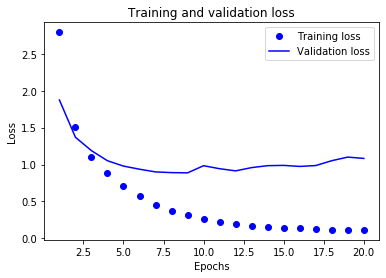

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

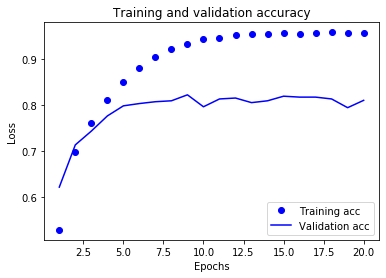

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 241us/sample - loss: 2.5025 - accuracy: 0.5350 - val_loss: 1.6429 - val_accuracy: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 150us/sample - loss: 1.3567 - accuracy: 0.7174 - val_loss: 1.2723 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 154us/sample - loss: 1.0242 - accuracy: 0.7810 - val_loss: 1.1393 - val_accuracy: 0.7400
Epoch 4/9
7982/7982 [==============================] - 1s 158us/sample - loss: 0.8112 - accuracy: 0.8244 - val_loss: 1.0323 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 149us/sample - loss: 0.6529 - accuracy: 0.8646 - val_loss: 0.9890 - val_accuracy: 0.7770
Epoch 6/9
7982/7982 [==============================] - 1s 152us/sample - loss: 0.5241 - accuracy: 0.8914 - val_loss: 0.9226 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 154us/sample

In [22]:
results

[0.9823209402928476, 0.7871772]